In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import io
from google.colab import files
uploaded=files.upload()

Saving Effort and Arrival (1).xlsx to Effort and Arrival (1).xlsx


In [5]:
df=pd.read_excel(io.BytesIO(uploaded['Effort and Arrival (1).xlsx']))
df.head()

,Job Level of the employee,# of years of experience,ITILProcessType,Complexity,Effort,Service Domain type
0,3,0.72,Release Management,Medium,55,App suport
1,3,0.72,Release Management,Medium,55,App suport
2,3,2.75,Service Request,Medium,72,Database Support
3,3,0.72,Release Management,Medium,55,App suport
4,3,0.72,Release Management,Medium,55,App suport


In [7]:
df.shape

(6460, 6)

In [11]:
df['ITILProcessType'].value_counts()

Incident Management    3115
Service Request        2847
Release Management      498
Name: ITILProcessType, dtype: int64

In [13]:
df['Complexity'].value_counts()

Simple     4026
Medium     2306
Complex     128
Name: Complexity, dtype: int64

In [15]:
df['Complexity'][df['Complexity']=='Medium'].value_counts()

Medium    2306
Name: Complexity, dtype: int64

In [16]:
df['Complexity'][df['Complexity']=='Simple'].value_counts()

Simple    4026
Name: Complexity, dtype: int64

In [17]:
df['Complexity'][df['Complexity']=='Complex'].value_counts()

Complex    128
Name: Complexity, dtype: int64

In [18]:
df['ITILProcessType'][df['Complexity']=='Medium'].value_counts()

Service Request        971
Incident Management    951
Release Management     384
Name: ITILProcessType, dtype: int64

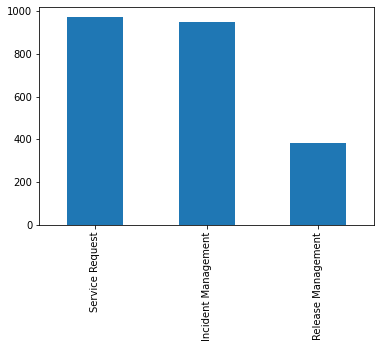

In [19]:
df['ITILProcessType'][df['Complexity']=='Medium'].value_counts().plot(kind='bar')

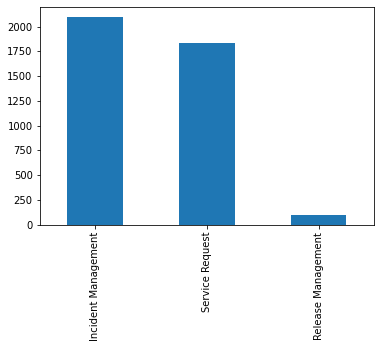

In [22]:
df['ITILProcessType'][df['Complexity']=='Simple'].value_counts().plot(kind='bar')

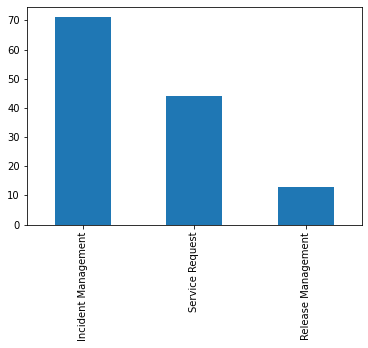

In [23]:
df['ITILProcessType'][df['Complexity']=='Complex'].value_counts().plot(kind='bar')

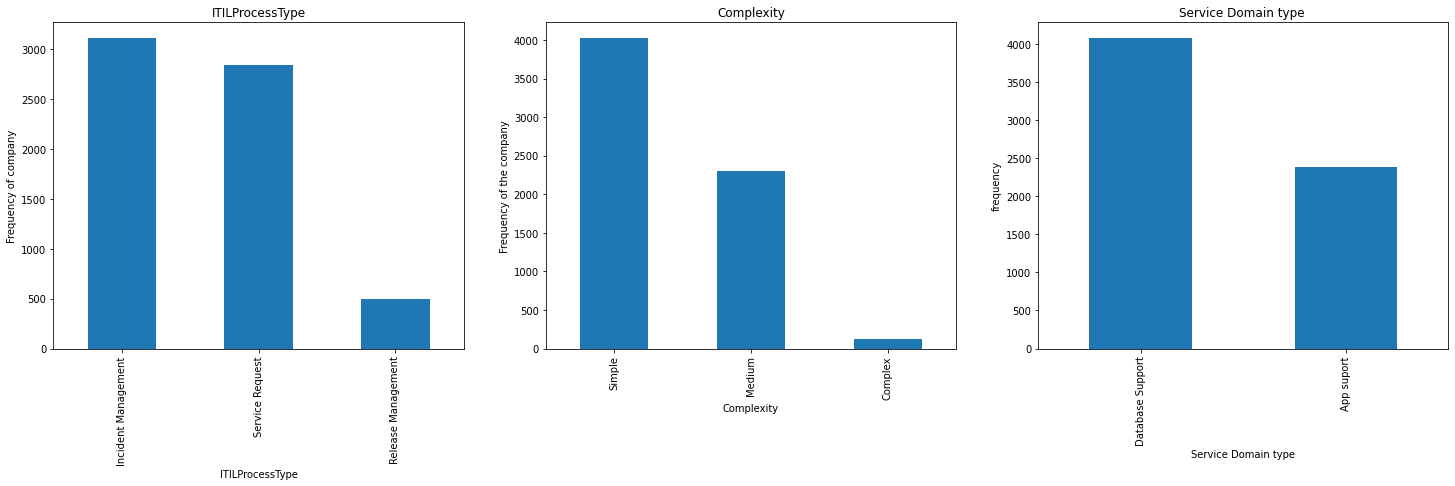

In [28]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1=df.ITILProcessType.value_counts().plot(kind='bar')
plt.title('ITILProcessType')
plt1.set(xlabel='ITILProcessType', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1=df.Complexity.value_counts().plot(kind='bar')
plt.title("Complexity")
plt1.set(xlabel="Complexity",ylabel="Frequency of the company")

plt.subplot(1,3,3)
plt1=df['Service Domain type'].value_counts().plot(kind='bar')
plt.title("Service Domain type ")
plt1.set(xlabel="Service Domain type", ylabel="frequency")

plt.show()

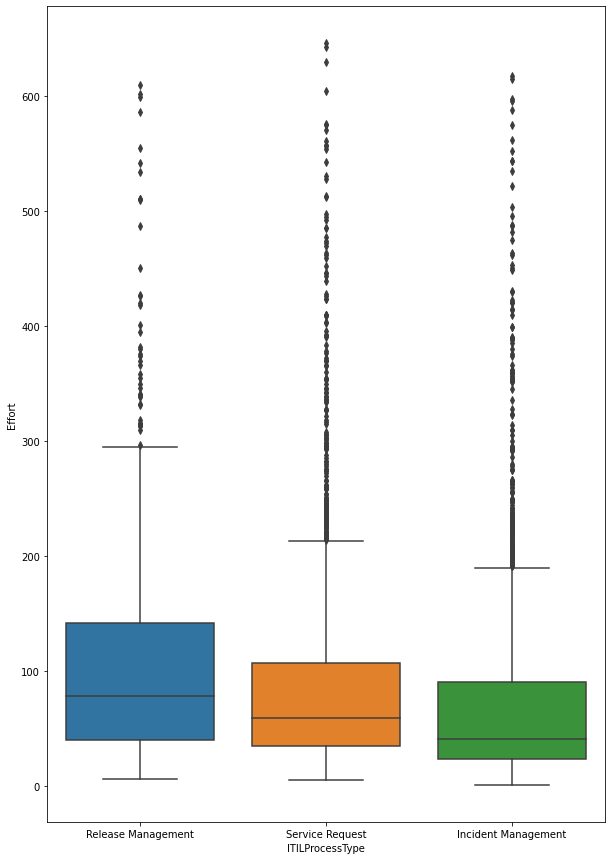

In [33]:

plt.figure(figsize=(10,15))
sns.boxplot(x='ITILProcessType' ,y='Effort', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


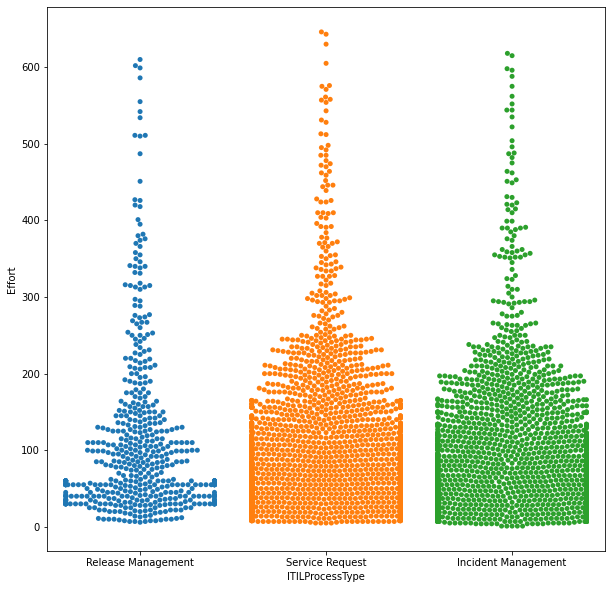

In [34]:

plt.figure(figsize=(10,10))
sns.swarmplot(x='ITILProcessType' ,y='Effort', data=df)
plt.show()

In [35]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [36]:
((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).sum()

# of years of experience      204
Complexity                      0
Effort                        441
ITILProcessType                 0
Job Level of the employee    1506
Service Domain type             0
dtype: int64

In [37]:
from scipy import stats
z=np.abs(stats.zscore(df['Effort']))

In [38]:
print(z)

[0.31044308 0.31044308 0.10949969 ... 0.15054469 0.0622189  0.0914437 ]


In [39]:
print(np.where(z>3))

(array([  23,   56,   94,  102,  114,  127,  153,  196,  220,  287,  356,
        382,  395,  414,  416,  423,  449,  474,  475,  494,  507,  534,
        594,  639,  686,  689,  702,  725,  738,  805,  809,  817,  834,
        858,  869,  873,  877,  900,  922,  930,  931,  936,  973,  993,
       1072, 1099, 1103, 1186, 1228, 1230, 1366, 1398, 1402, 1419, 1461,
       1468, 1511, 1545, 1655, 1679, 1681, 1683, 1684, 1685, 1689, 1696,
       1764, 1832, 1911, 1912, 1995, 2014, 2027, 2214, 2223, 2306, 2313,
       2319, 2364, 2393, 2395, 2421, 2451, 2501, 2509, 2514, 2552, 2589,
       2659, 2717, 2887, 2994, 3091, 3093, 3096, 3103, 3112, 3113, 3126,
       3132, 3225, 3230, 3242, 3266, 3412, 3481, 3534, 3597, 3605, 3628,
       3635, 3644, 3796, 3836, 3850, 3856, 3861, 3932, 3952, 4062, 4084,
       4254, 4443, 4469, 4507, 4520, 4544, 4642, 4661, 4690, 4750, 4751,
       4827, 4946, 4972, 4986, 5023, 5049, 5059, 5109, 5119, 5122, 5128,
       5195, 5415, 5425, 5476, 5578, 5579, 5813, 6

In [40]:
df['Effort'].skew()

2.625454375023274

In [41]:
df['Effort'].describe()

count    6460.000000
mean       81.263777
std        84.607490
min         1.000000
25%        30.000000
50%        52.000000
75%       103.000000
max       646.000000
Name: Effort, dtype: float64

In [44]:
df['Effort'][df['Complexity']=='Complex'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

count    128.000000
mean     148.750000
std      117.490827
min       16.000000
10%       40.700000
20%       59.400000
30%       69.000000
40%       90.600000
50%      113.000000
60%      143.400000
70%      165.000000
80%      212.400000
90%      345.000000
100%     544.000000
max      544.000000
Name: Effort, dtype: float64

In [45]:
Q1=df['Effort'][df['Complexity']=='Complex'].quantile(0.25)
Q3=df['Effort'][df['Complexity']=='Complex'].quantile(0.75)
IQR=Q3-Q1

In [46]:
IQR

126.0

In [50]:
((df['Effort'][df['Complexity']=='Complex']<(Q1-1.5*IQR)) | (df['Effort'][df['Complexity']=='Complex']>(Q3+1.5*IQR))).sum()

10

In [51]:
((df['Effort'][df['Complexity']=='Complex']<(Q1-1.5*IQR)) | (df['Effort'][df['Complexity']=='Complex']>(Q3+1.5*IQR))).value_counts()

False    118
True      10
Name: Effort, dtype: int64

In [52]:
df['Effort'][df['Complexity']=='Simple'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

count    4026.000000
mean       62.368604
std        53.707732
min         1.000000
10%        17.000000
20%        22.000000
30%        28.000000
40%        34.000000
50%        42.000000
60%        53.000000
70%        69.000000
80%        98.000000
90%       146.000000
100%      250.000000
max       250.000000
Name: Effort, dtype: float64

In [55]:
df['Effort'][df['Complexity']=='Medium'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

count    2306.000000
mean      110.506505
std       111.935576
min         4.000000
10%        22.000000
20%        34.000000
30%        44.000000
40%        56.000000
50%        70.000000
60%        90.000000
70%       115.000000
80%       160.000000
90%       262.500000
100%      646.000000
max       646.000000
Name: Effort, dtype: float64

In [54]:
df['Complexity'].value_counts()

Simple     4026
Medium     2306
Complex     128
Name: Complexity, dtype: int64